In [1]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem import PandasTools
from rdkit.Chem.Draw import IPythonConsole
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
import math

In [2]:
# load predicted values from the previous 6-fold cross-validation as df
fps_xgboost_h_1 = pd.read_csv('/Users/jiayun/Documents/work/ecfp_baseline/fps_xgboost_hansen_h_fold_1.csv')
fps_xgboost_h_2 = pd.read_csv('/Users/jiayun/Documents/work/ecfp_baseline/fps_xgboost_hansen_h_fold_2.csv')
fps_xgboost_h_3 = pd.read_csv('/Users/jiayun/Documents/work/ecfp_baseline/fps_xgboost_hansen_h_fold_3.csv')
fps_xgboost_h_4 = pd.read_csv('/Users/jiayun/Documents/work/ecfp_baseline/fps_xgboost_hansen_h_fold_4.csv')
fps_xgboost_h_5 = pd.read_csv('/Users/jiayun/Documents/work/ecfp_baseline/fps_xgboost_hansen_h_fold_5.csv')
fps_xgboost_h_6 = pd.read_csv('/Users/jiayun/Documents/work/ecfp_baseline/fps_xgboost_hansen_h_fold_6.csv')
# concat the data, rename columns (actual=experimentally determined value)
fps_xgboost = pd.concat((fps_xgboost_h_1, fps_xgboost_h_2, fps_xgboost_h_3, fps_xgboost_h_4, fps_xgboost_h_5, fps_xgboost_h_6),axis=0)
fps_xgboost = fps_xgboost.rename({'3': 'SMILES', '4':'Mol_No', '5': 'actual', '6':'predict'}, axis='columns')

In [3]:
# MAE, AE and RMSE give an idea of the error distribution
print(mean_absolute_error(fps_xgboost['actual'], fps_xgboost['predict']))

#RMSEs
print(math.sqrt(mean_squared_error(fps_xgboost['actual'], fps_xgboost['predict'])))

# R^2 Coefficient of Determination
print(r2_score(fps_xgboost['actual'], fps_xgboost['predict']))

2.203793637989856
3.5552656544187933
0.5267651511096381


In [4]:
len(fps_xgboost)

1183

In [5]:
# calculate the residual value for each molecule
fps_xgboost['residual']= fps_xgboost['predict']-fps_xgboost['actual']

In [6]:
# calculate standardised deviation of the residuals (sdr) of the dataset
# equations used: sdr = sqrt((sum((residual)**2))/(n-2))
sdr = np.sqrt((fps_xgboost['residual']**2).sum()/(len(fps_xgboost)-2))
sdr

3.5582747668105528

In [7]:
# calculate how many sdr each molecule's predicted value is away from the exp value 
fps_xgboost['std_residual'] = fps_xgboost['residual']/sdr
fps_xgboost['std_residual']

0     -0.136834
1     -0.207008
2      0.640232
3      0.876688
4     -0.243838
         ...   
192   -0.943621
193   -0.258059
194   -0.713985
195    0.259766
196    0.378176
Name: std_residual, Length: 1183, dtype: float64

In [8]:
# n is 2 or 3. Points 2 or 3 sdr away from the prediction line are likely to be outliers
n = 3
fps_xgboost_outliers = fps_xgboost.loc[abs(fps_xgboost['std_residual']) > n]
fps_xgboost_outliers

,Unnamed: 0,0,1,2,SMILES,Mol_No,actual,predict,residual,std_residual
144,144,845,847,845,COO,845,30.0,11.101633,-18.898367,-5.311104
180,180,1079,1081,1079,CC(C)(c1ccc(O)cc1)c2c(Br)cc(OBr)c(Br)c2Br,1079,13.8,27.792934,13.992934,3.932505
15,15,72,72,72,Oc1ccc(O)cc1,72,27.2,15.838763,-11.361237,-3.192906
39,39,239,239,239,Cc1ccc(O)c(c1)C(C)(C)C,239,10.5,23.533020,13.033020,3.662736
53,53,319,319,319,CC=NO,319,20.2,8.468398,-11.731602,-3.296992
64,64,367,367,367,N,367,18.8,6.481672,-12.318328,-3.461882
132,132,762,764,762,OO,762,42.7,13.070056,-29.629944,-8.327053
139,139,818,820,818,CO,818,22.3,9.894170,-12.405830,-3.486473
175,175,993,995,993,FC(F)=C(F)F,993,0.0,12.559332,12.559332,3.529613
85,85,475,475,475,BrC#N,475,0.0,13.201501,13.201501,3.710085


In [9]:
# Set the default text font size
plt.rc('font', size=22)

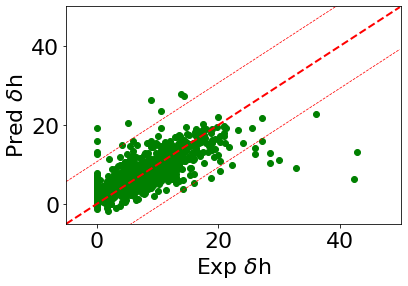

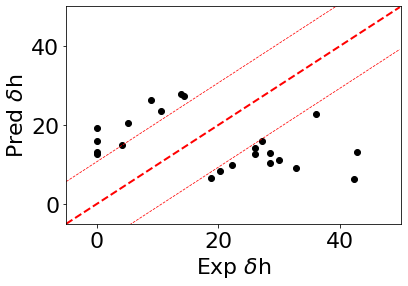

In [15]:
# plot two figures
plt.figure(2)

# plot of exp vs pred of all molecules in the dataset
# The thick red lines indicate ideal agreement between the predicted and experimental values. 
# The dashed red lines indicate 3 srd (n=3) away from the ideal agreement. 
ln = np.arange(-5, 50, 0.2)
plt.plot(ln, ln,'r--', linewidth = '2')
plt.plot(ln, ln+n*sdr,'r--', linewidth = '0.75')
plt.plot(ln, ln-n*sdr,'r--', linewidth = '0.75')
plt.scatter(x=fps_xgboost['actual'], y=fps_xgboost['predict'], color='green')
plt.xlabel('Exp $\delta$h')
plt.ylabel('Pred $\delta$h')
plt.xlim([-5,50])
plt.ylim([-5,50])
plt.show()

# Plot of the outliers identified 
# check visually to confirm they are on or beyond 3 srd
ln = np.arange(-5, 50, 0.2)
plt.plot(ln, ln,'r--', linewidth = '2')
plt.plot(ln, ln+n*sdr,'r--', linewidth = '0.75')
plt.plot(ln, ln-n*sdr,'r--', linewidth = '0.75')
plt.scatter(x=fps_xgboost_outliers['actual'], y=fps_xgboost_outliers['predict'], color='black')
plt.xlabel('Exp $\delta$h')
plt.ylabel('Pred $\delta$h')
plt.xlim([-5,50])
plt.ylim([-5,50])
plt.show()

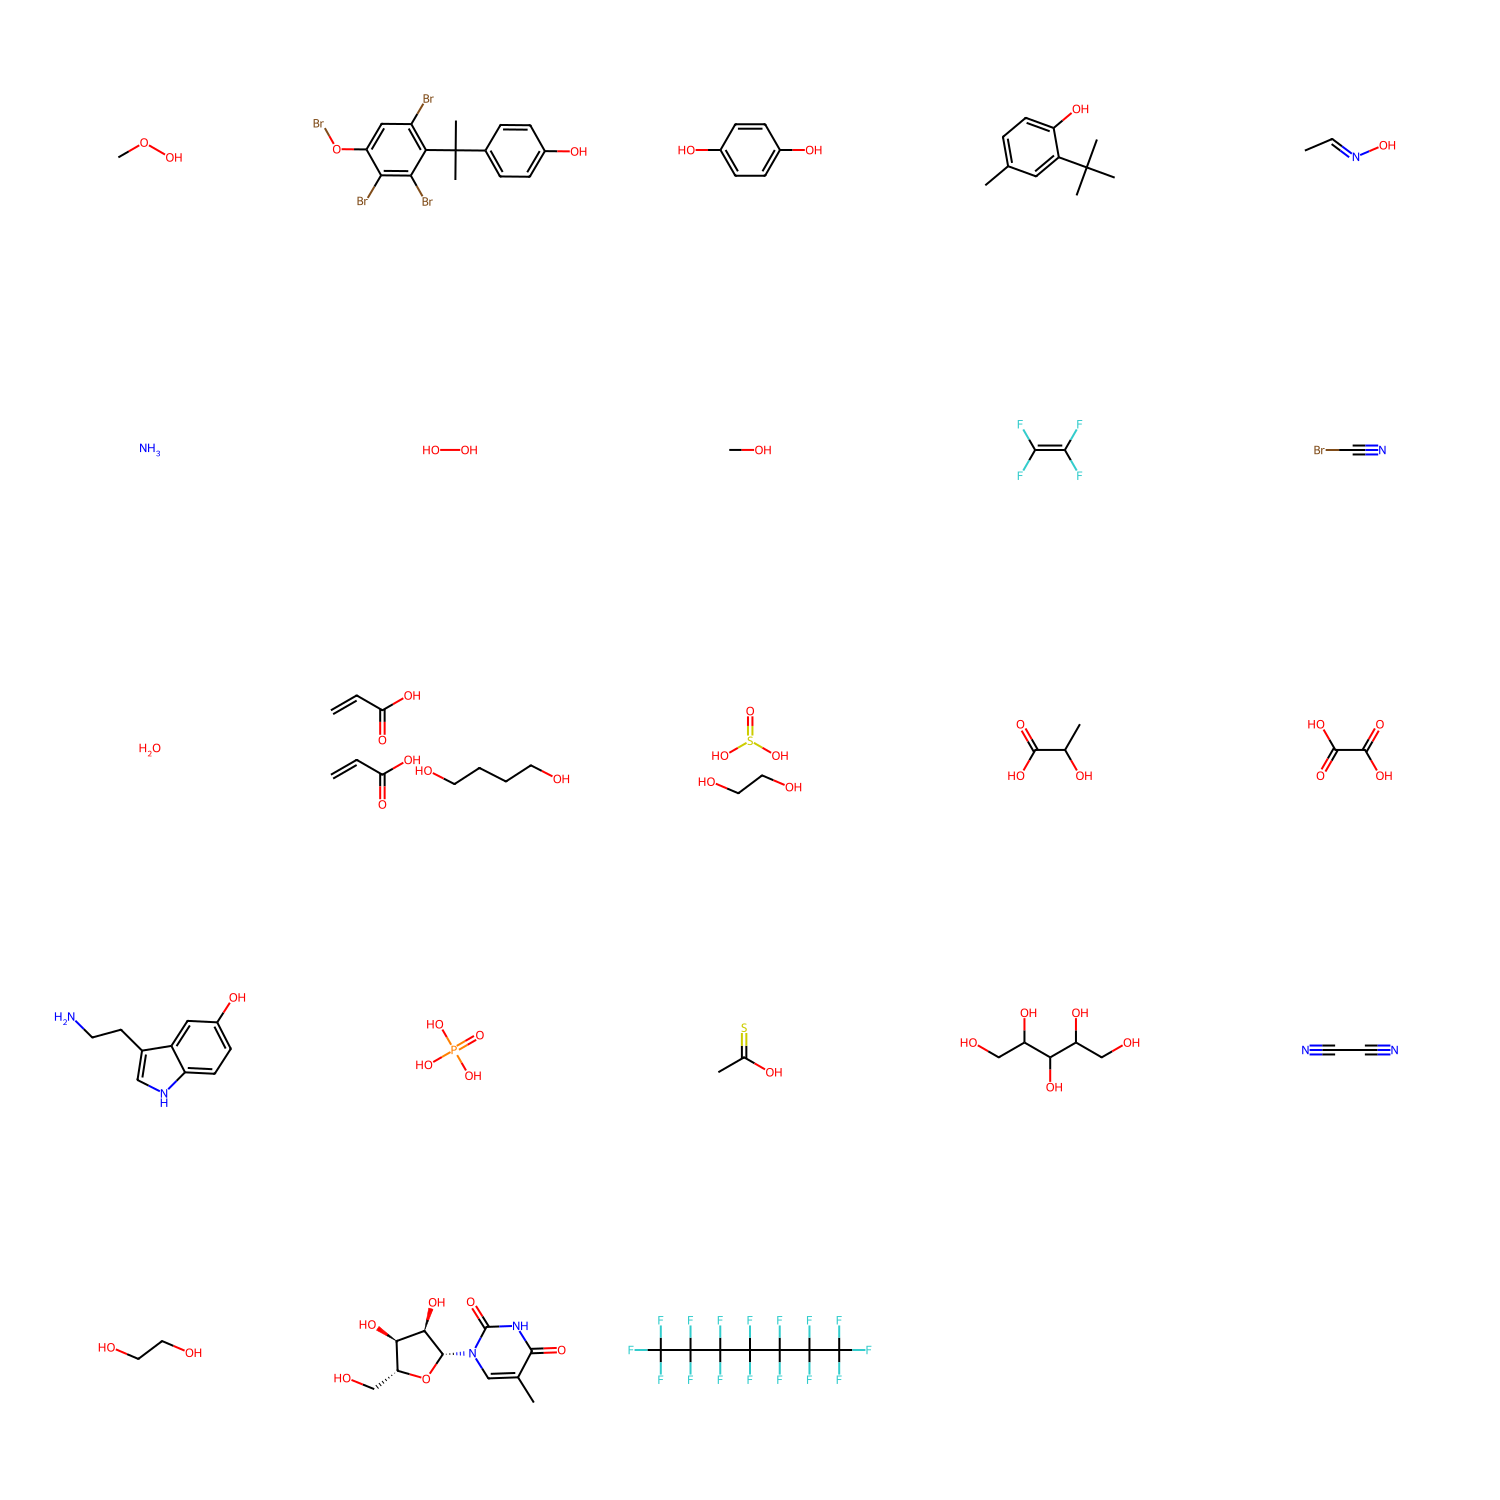

In [16]:
# draw n=3 outlier structure
outliners = [Chem.MolFromSmiles(x) for x in fps_xgboost_outliers['SMILES']]
Draw.MolsToGridImage(outliners, subImgSize=(300,300), molsPerRow=5, maxMols=50)

In [17]:
# n is 2 or 3. Points 2 or 3 sdr away from the prediction line are likely to be outliers
n = 2
fps_xgboost_outliers2 = fps_xgboost.loc[abs(fps_xgboost['std_residual']) > n]
len(fps_xgboost_outliers2)

49

In [18]:
fps_xgboost_outliers2

,Unnamed: 0,0,1,2,SMILES,Mol_No,actual,predict,residual,std_residual
116,116,679,680,679,OCCC#N,679,17.6,10.314026,-7.285974,-2.047614
121,121,721,722,721,CF,721,9.5,2.033365,-7.466635,-2.098386
122,122,723,724,723,C=O,723,15.4,7.227139,-8.172861,-2.296860
144,144,845,847,845,COO,845,30.0,11.101633,-18.898367,-5.311104
158,158,937,939,937,CN[C@@H](C)[C@H](O)c1ccccc1,937,24.1,15.549652,-8.550348,-2.402948
171,171,1010,1012,1010,Oc1c(cc(cc1[N+]([O-])=O)[N+]([O-])=O)[N+]([O-])=O,1010,6.0,15.917940,9.917940,2.787289
177,177,1045,1047,1045,[nH]1cnc2ncncc12,1045,14.2,6.131119,-8.068881,-2.267638
178,178,1048,1050,1048,c1ccncc1,1048,5.9,13.355430,7.455430,2.095237
180,180,1079,1081,1079,CC(C)(c1ccc(O)cc1)c2c(Br)cc(OBr)c(Br)c2Br,1079,13.8,27.792934,13.992934,3.932505
15,15,72,72,72,Oc1ccc(O)cc1,72,27.2,15.838763,-11.361237,-3.192906


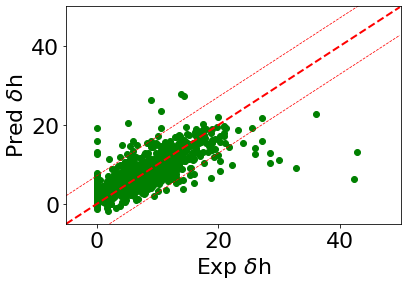

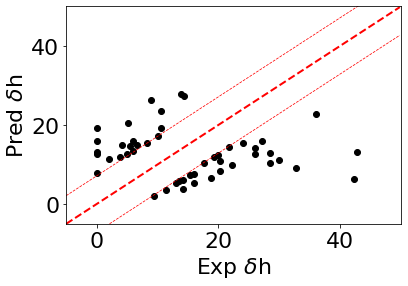

In [20]:
# plot two figures
plt.figure(2)

# plot of exp vs pred of all molecules in the dataset
# The thick red lines indicate ideal agreement between the predicted and experimental values. 
# The dashed red lines indicate 2 srd (n=2) away from the ideal agreement. 
ln = np.arange(-5, 50, 0.2)
plt.plot(ln, ln,'r--', linewidth = '2')
plt.plot(ln, ln+n*sdr,'r--', linewidth = '0.75')
plt.plot(ln, ln-n*sdr,'r--', linewidth = '0.75')
plt.scatter(x=fps_xgboost['actual'], y=fps_xgboost['predict'], color='green')
plt.xlabel('Exp $\delta$h')
plt.ylabel('Pred $\delta$h')
plt.xlim([-5,50])
plt.ylim([-5,50])
plt.show()

# Plot of the outliers identified 
# check visually to confirm they are on or beyond 2 srd
ln = np.arange(-5, 50, 0.2)
plt.plot(ln, ln,'r--', linewidth = '2')
plt.plot(ln, ln+n*sdr,'r--', linewidth = '0.75')
plt.plot(ln, ln-n*sdr,'r--', linewidth = '0.75')
plt.scatter(x=fps_xgboost_outliers2['actual'], y=fps_xgboost_outliers2['predict'], color='black')
plt.xlabel('Exp $\delta$h')
plt.ylabel('Pred $\delta$h')
plt.xlim([-5,50])
plt.ylim([-5,50])
plt.show()

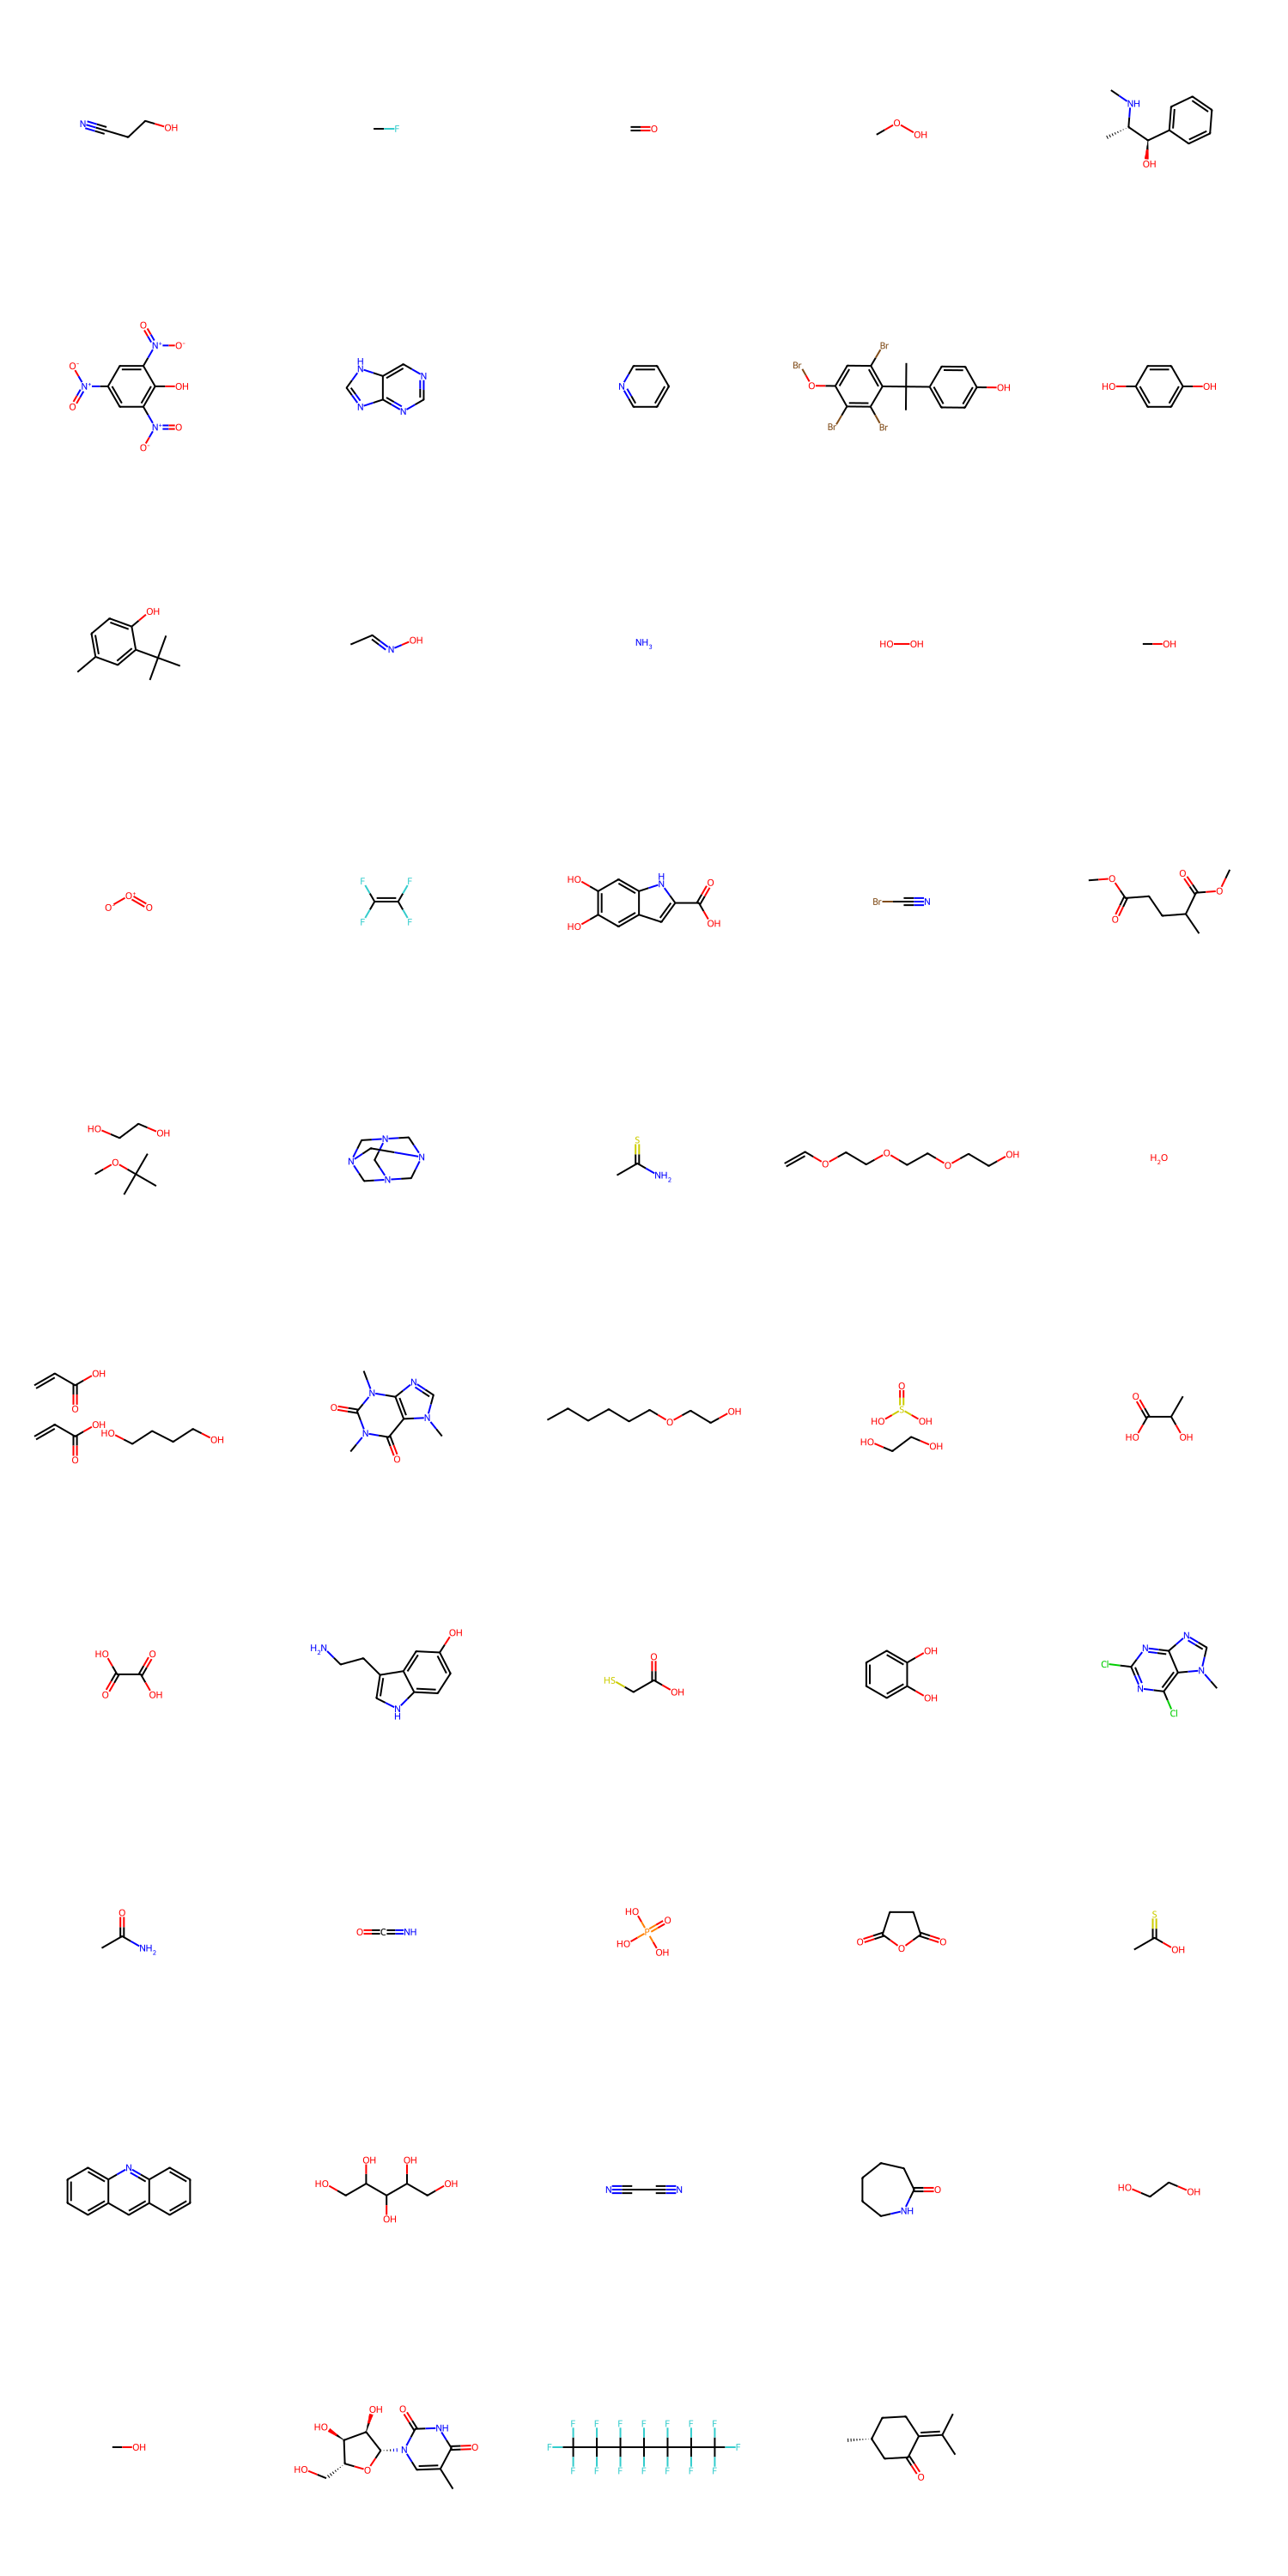

In [16]:
# draw n=2 outlier structure
outliners2 = [Chem.MolFromSmiles(x) for x in fps_xgboost_outliers2['SMILES']]
Draw.MolsToGridImage(outliners2, subImgSize=(300,300), molsPerRow=5, maxMols=100)

In [17]:
# save outliers (n=2) info to a csv file
fps_xgboost_outliers2.to_csv('fps_xgboost_h_outliers2.csv')

In [18]:
from rdkit.Chem import Descriptors
gpHSP_data = pd.read_csv('/Users/jiayun/Documents/work/mol2vec/hansen_1k_smiles_shorter.csv')
mol_smiles = gpHSP_data['SMILES']

# calculate molecular weight of the full dataset
molwt = [(Descriptors.ExactMolWt(Chem.MolFromSmiles(x))) for x in gpHSP_data['SMILES']]
np_molwt = np.asarray(molwt)

# calculate molecular weight of outliers
molwt_outliers2 = [(Descriptors.ExactMolWt(Chem.MolFromSmiles(x))) for x in fps_xgboost_outliers2['SMILES']]
np_molwt_outliers2 = np.asarray(molwt_outliers2)

# Compare average molecular weight for full data and outliers
print(np.average(np_molwt))
print(np.average(np_molwt_outliers2))

131.2953603288794
125.60529005408164


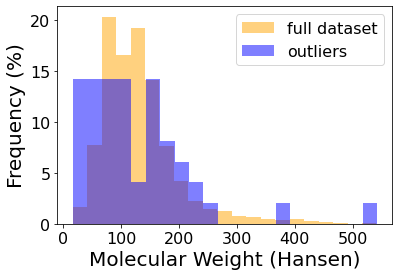

In [19]:
# plot molecular weight distribution for the full dataset and the outliers
bin_width = 25
df = pd.DataFrame(np_molwt, columns = ["full dataset"])
df2 = pd.DataFrame(np_molwt_outliers2, columns = ["outliers"])

ax = df.plot.hist(bins=(np.arange(min(molwt), max(molwt)+bin_width, bin_width)), alpha=0.5, color='orange', weights=np.ones_like(df.index) *100/ len(df))
df2.plot(kind='hist', bins=(np.arange(min(molwt_outliers2), max(molwt_outliers2)+bin_width, bin_width)), alpha=0.5, color='blue', weights=np.ones_like(df2.index) *100 /len(df2), ax=ax)
ax.set_xlabel("Molecular Weight (Hansen)", size=20)
ax.set_ylabel("Frequency (%)", size=20)
plt.show()